In [97]:
'''Student Name: Kaiwen Suo
   Student ID: 1005764816
   Course: INF2178
   Asisgnment: AS4
   Date: Apr 5 2024
'''

'Student Name: Kaiwen Suo\n   Student ID: 1005764816\n   Course: INF2178\n   Asisgnment: AS4\n   Date: Apr 5 2024\n'

In [98]:
#load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
!pip install pingouin
import pingouin as pg
import scipy.stats as stats
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.formula.api import mixedlm
from scipy.stats import levene
from statsmodels.stats.power import TTestIndPower
%pip install dfply
from dfply import *

In [99]:
# Display data briefly
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/AS4/INF2178_A4_data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


# Data Preparation

In [100]:
df.isnull().sum() # Check for missing values

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [101]:
df = df.dropna(subset=['MMSE','SES']) # drop missing value
df.isnull().sum()

Unnamed: 0    0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

# EDA

# eTIV

In [102]:
# Summary of the eTIV by group
df.groupby(['Visit', 'Group'])['eTIV'].agg(['mean', 'std']).round(2)


mean     std
Visit Group                       
1     Converted    1438.29  132.95
      Demented     1478.84  174.88
      Nondemented  1480.11  183.75
2     Converted    1446.25  150.29
      Demented     1492.73  176.62
      Nondemented  1482.69  186.32

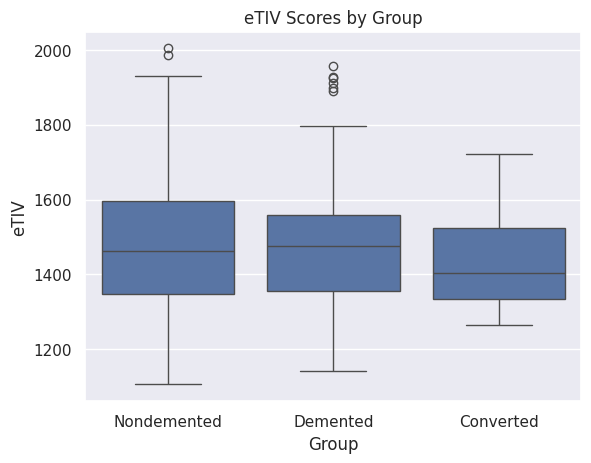

In [103]:
#Boxplot of eTIV scores by Group across Visits
sns.boxplot(data=df, x='Group', y='eTIV')
plt.title('eTIV Scores by Group')
plt.show()

<ipython-input-104-c33071f6e1c0>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='eTIV', hue='Group', dodge=True, markers=['o', 's','p'],


<Axes: xlabel='Visit', ylabel='eTIV'>

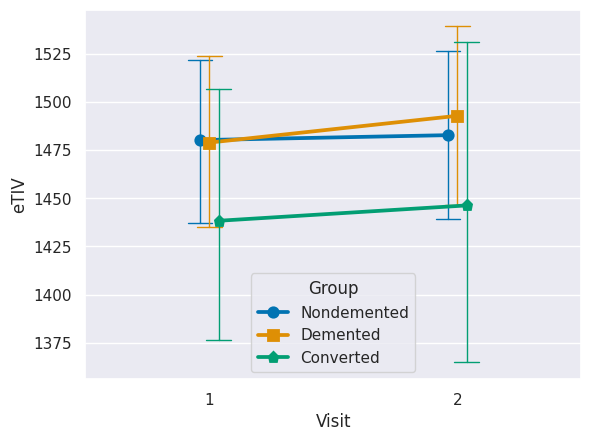

In [104]:
# Change in eTIV Across Visits by Group'
sns.set()
sns.pointplot(data=df, x='Visit', y='eTIV', hue='Group', dodge=True, markers=['o', 's','p'],
	      capsize=.1, errwidth=1, palette='colorblind')


# nWBV

In [105]:
# Summary of the nWBV by group
df.groupby(['Visit', 'Group'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    0.74  0.03
      Demented     0.72  0.03
      Nondemented  0.75  0.04
2     Converted    0.73  0.04
      Demented     0.71  0.03
      Nondemented  0.74  0.04

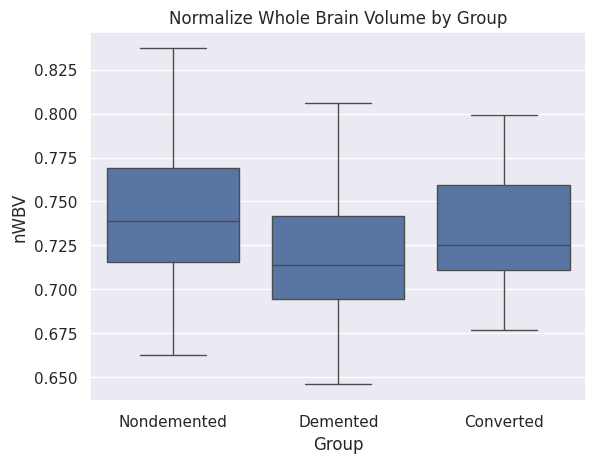

In [106]:
# Boxplot of nWBV by group across Visits
sns.boxplot(data=df, x='Group', y='nWBV')
plt.title('Normalize Whole Brain Volume by Group')
plt.show()

<ipython-input-107-69dd1ecc425a>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='nWBV', hue='Group', dodge=True, markers=['o', 's','p'],


<Axes: xlabel='Visit', ylabel='nWBV'>

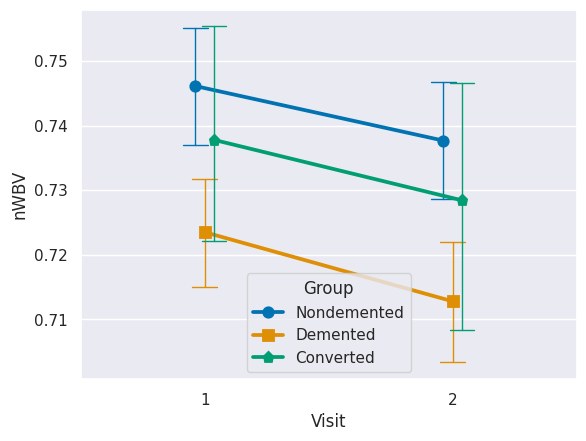

In [107]:
# Change in nWBV Across Visits by Group'
sns.set()
sns.pointplot(data=df, x='Visit', y='nWBV', hue='Group', dodge=True, markers=['o', 's','p'],
	      capsize=.1, errwidth=1, palette='colorblind')

# Mixed Anova

# Model 1 eTIV

In [108]:
# two-way mixed-design ANOVA - Model 1 for MMSE
aov = pg.mixed_anova(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=df)
pg.print_table(aov)



ANOVA SUMMARY

Source              SS    DF1    DF2         MS      F    p-unc    np2      eps
-----------  ---------  -----  -----  ---------  -----  -------  -----  -------
Group        38580.795      2    134  19290.398  0.306    0.737  0.005  nan
Visit         5073.142      1    134   5073.142  8.139    0.005  0.057    1.000
Interaction    953.089      2    134    476.545  0.765    0.468  0.011  nan



In [109]:
# post-hoc test
posthocs = pg.pairwise_ttests(dv='eTIV', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc    BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------  --------
Visit          -        1          2            True      True          -2.858  136.000  two-sided        0.005   4.642    -0.048
Group          -        Converted  Demented     False     True          -0.909   18.492  two-sided        0.375   0.430    -0.256
Group          -        Converted  Nondemented  False     True          -0.796   17.491  two-sided        0.437   0.393    -0.210
Group          -        Demented   Nondemented  False     True           0.190  118.525  two-sided        0.850   0.195     0.034
Visit * Group  1        Converted  Demented     False     True          -0.873   18.992  two-sided        0.393   0.419    -0.241
Visit * Group  1        Converted  Nondemented  False     True          -

# Assumption Check for Model 1

In [110]:
# Assumption 1: Normality of residuals(Shapiro-Wilk test) - Model 1 (eTIV)
shapiro_results = pg.normality(df, dv='eTIV', group='Group', method='shapiro')
print(shapiro_results)

                    W      pval  normal
Group                                  
Nondemented  0.972846  0.006306   False
Demented     0.959160  0.001826   False
Converted    0.918397  0.041241   False


In [111]:
# Assumption 2: Homogeneity of variances(Levene's test) - - Model 1 (eTIV)
levene_results = pg.homoscedasticity(df, dv='eTIV', group='Group')
print(levene_results)

               W      pval  equal_var
levene  1.319443  0.268965       True


# Model 2 nWBV

In [112]:
# two-way mixed-design ANOVA - Model 2 for nWBV
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)
pg.print_table(aov)



ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.033      2    134  0.017   6.384    0.002  0.087  nan
Visit        0.006      1    134  0.006  89.376    0.000  0.400    1.000
Interaction  0.000      2    134  0.000   1.630    0.200  0.024  nan



In [113]:
# post-hoc test
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           9.410  136.000  two-sided        0.000  35120000000000.000     0.251
Group          -        Converted  Demented     False     True           1.436   15.523  two-sided        0.171               0.698     0.471
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527               0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.620  121.919  two-sided        0.000              59.810    -0.637
Visit * Group  1        Converted  Demented     False     True           1.467   15.433  two-sided        0.162               0.724

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


# Assumption Check for Model 2

In [114]:
# Assumption 1: Normality of residuals(Shapiro-Wilk test) - Model 2(nWBV)
shapiro_results = pg.normality(df, dv='nWBV', group='Group', method='shapiro')
print(shapiro_results)

                    W      pval  normal
Group                                  
Nondemented  0.988882  0.317042    True
Demented     0.987060  0.365938    True
Converted    0.958236  0.358018    True


In [115]:
# Assumption 2: Homogeneity of variances(Levene's test) - Model 2(nWBV)
levene_results = pg.homoscedasticity(df, dv='nWBV', group='Group')
print(levene_results)


               W      pval  equal_var
levene  0.488944  0.613804       True


# Statistical Power Analysis

In [116]:
# statistical power for t-tests
# import required modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower

# factors for power analysis
alpha = 0.05
power = 0.91


# perform power analysis to find sample size
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=0.7, alpha=alpha, power=power,
					ratio=1, alternative='two-sided')

print('Sample size/Number needed in each group: {:.3f}'.format(n))


Sample size/Number needed in each group: 45.451


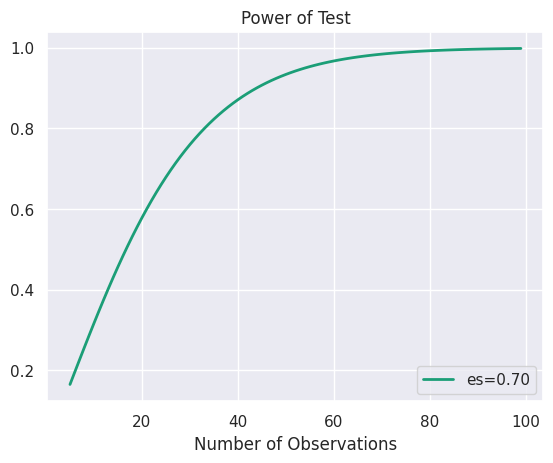

In [117]:
#power curves
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower


# power analysis varying parameters
effect_sizes = np.array([0.7])
sample_sizes = np.array(range(5, 100))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()
